# Analyze the linear model coefficients

### Author - Chris Wyburn-Powell, see the latest version on [github](https://github.com/chrisrwp/low-frequency-variability/blob/main/neural_network/Analyze_Linear_Model_Coefs.ipynb)

**Input:**
- `CMIP6_members_CVDP_and_SIC.pickle`
- `validation_r_values_4ML_<model_name>_<month>_month_var_9_best_season_LE_all_region_Sep_lowpass_filt.nc`
- `validation_r_values_4ML_CMIP6_month_<month>_var_9_best_season_LE_all_region_Sep_lowpass_filt_1920_2014.nc`
- `validation_r_values_4ML_CMIP6_30_month_<month>_var_9_best_season_LE_all_region_Sep_filt_1920_2014.nc`
- `weights_linear_<model_name>_month_<month>_var_9_all_IPO_lowpass_filt.nc`
- `weights_linear_CMIP6_month_<month>_var_9_best_season_LE_all_region_Sep_lowpass_filt.nc`
- `test_r_values_linear_CMIP6_var_9_best_season_LE_all_region_Sep.nc`
- `test_r_values_linear_LEs_var_9_best_season_LE_all_region_Sep.nc`

**Output:**
- Figure 4, S1, S2
- Figure 5
- Figure S3
- Figure 6

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib as mpl
import datetime
import pickle
print(datetime.datetime.now())

2023-11-20 14:44:53.839511


In [2]:
with open('/glade/work/cwpowell/low-frequency-variability/raw_data/CMIP6_info/'\
          +'CMIP6_members_CVDP_and_SIC.pickle', 'rb') as handle:
    good_GCM_mem = pickle.load(handle)

all_GCM_list = sorted(good_GCM_mem, key=lambda k: len(good_GCM_mem[k]), 
                      reverse=True)
    
LE_GCM_10 = []
LE_GCM_15 = []
for GCM in all_GCM_list:
    if len(good_GCM_mem[GCM]) > 15: LE_GCM_15.append(GCM)
    if len(good_GCM_mem[GCM]) > 10: LE_GCM_10.append(GCM)
    
month_names_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                     'Sep', 'Oct', 'Nov', 'Dec']

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

region_names_short = [
    'Beaufort Sea', 'Chukchi Sea', 'E. Siberian Sea', 'Laptev Sea', 'Kara Sea', 
    'Barents Sea', 'Greenland', 'Baffin', 'Canadian AA', 'Hudson', 
    'Central Arctic', 'Bering', 'Baltic', 'Okhotsk', 'Yellow', 'Cook',      
]

season_months = {'1':'DJF','4':'MAM','7':'JJA','10':'SON'}
    
CVDP_var = [
    'AMO', 'IPO', 'NINO34', 'PDO', 'AMM', 'ATN', 'IOD', 'NPI', 'NAM',  'NPO', 
    'PNA', 'NAO', 'SAM', 'TAS', 'RAND',
]

CVDP_var_descriptions = {'AMO': 'Atlantic Multidecadal Oscillation',
                         'IPO': 'Interdecadal Pacific Oscillation',
                         'NINO34': 'Niño 3.4 Index',
                         'PDO': 'Pacific Decadal Oscillation',
                         'AMM': 'Atlantic Meridional Mode',
                         'ATN': 'Atlantic Niño',
                         'IOD': 'Indian Ocean Dipole',
                         'AMOC': 'Atlantic Meridional Overturning Circulation',
                         'NPI': 'North Pacific Index',                         
                         'NAM': 'Northern Annular Mode',
                         'NPO': 'North Pacific Oscillation',
                         'PNA': 'Pacific/N. American Telecon.',
                         'NAO': 'North Atlantic Oscillation',
                         'SAM': 'Southern Annular Mode',
                         'TAS': 'Global Average Surface Temperature',
                         'RAND': 'Gaussian Normalized Random Variable'
                        }

CVDP_var_descriptions_short = {'AMO': 'Atlantic Multidecadal \n Oscillation (AMO)',
                              'IPO': 'Interdecadal Pacific \n Oscillation (IPO)',
                              'NINO34': 'Niño 3.4 Index \n (NINO34)',
                              'PDO': 'Pacific Decadal \n Oscillation (PDO)',
                              'AMM': 'Atlantic Meridional \n Mode (AMM)',
                              'ATN': 'Atlantic Niño \n (ATN)',
                              'IOD': 'Indian Ocean Dipole \n (IOD)',
                              'AMOC': 'Atlantic Meridional Overturning Circ.',
                              'NPI': 'North Pacific Index \n (NPI)',                         
                              'NAM': 'Northern Annular Mode \n (NAM)',
                              'NPO': 'North Pacific \n Oscillation (NPO)',
                              'PNA': 'Pacific/North American \n Teleconnection (PNA)',
                              'NAO': 'North Atlantic \n Oscillation (NAO)',
                              'SAM': 'Southern Annular Mode \n (SAM)',
                              'TAS': 'Global Average Surface \n Temperature (TAS)',
                              'RAND': 'Random Variable \n (RAND)'
                        }

In [4]:
#load coefficients for the LEs with at least 10 members
valid_r = {}
coefs = {}
persistence_lowpass = {}
month_list = np.arange(1,13)
for GCM in LE_GCM_15[:-1]:
    persistence_lowpass[GCM] = xr.open_dataset(
        '/glade/work/cwpowell/low-frequency-variability/null_model/Pearson_'\
        +f'correlation_SIC_lagged_1_20_years_lowpass_{GCM}.nc')['r_value']
    
    valid_months = []
    coefs_months = []
    for month_ in month_list:
        valid_months.append(xr.open_dataset(
            '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
            +f'validation_r_values_4ML_{GCM}_month_{str(month_).zfill(2)}'\
            +'_var_9_all_IPO_lowpass_filt.nc')['r_value'])
        coefs_months.append(xr.open_dataset(
            '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
            +f'weights_linear_{GCM}_month_{str(month_).zfill(2)}'\
            +'_var_9_all_IPO_lowpass_filt.nc')['weights'])
    valid_r_xr = xr.concat((valid_months), dim='month')
    valid_r_xr['month'] = month_list
    valid_r[GCM] = valid_r_xr
    
    coefs_xr = xr.concat((coefs_months), dim='month')
    coefs_xr['month'] = month_list
    coefs[GCM] = coefs_xr
        
            

In [3]:
all_GCMs = [
    'ACCESS-ESM1-5','CanESM5','CESM2-LENS','IPSL-CM6A-LR',
    'GISS-E2-1-G','GISS-E2-1-H','MIROC-ES2L','MIROC6', 'UKESM1-0-LL'
]

In [9]:
good_GCM_months = {
    '1': [9, 9, 9, 9, 9, 9],
    '2': [8, 8, 8, 8, 8, 8, 8],
    '3': [10, 10, 10, 10],
    '4': [10, 10],
    '5': [10, 10],
    '6': [9, 9, 9],
   '11': [8, 8, 8]
}

good_GCM_names = {
    '1': ['CanESM5', 'CESM2-LENS', 'MIROC6', 'GISS-E2-1-G', 'IPSL-CM6A-LR', 
          'GISS-E2-1-H'], 
    '2': ['CanESM5', 'MIROC6', 'GISS-E2-1-G', 'ACCESS-ESM1-5', 'IPSL-CM6A-LR',
          'MIROC-ES2L', 'UKESM1-0-LL'],
    '3': ['CanESM5', 'MIROC6', 'IPSL-CM6A-LR', 'MIROC-ES2L'],
    '4': ['CanESM5', 'UKESM1-0-LL'],
    '5': ['CanESM5', 'UKESM1-0-LL'],
    '6': ['CanESM5', 'GISS-E2-1-H', 'UKESM1-0-LL'],
   '11': ['CanESM5', 'ACCESS-ESM1-5', 'UKESM1-0-LL']
}

#load data 
weights_all_regions = []
for region_key in [1,2,3,4,5,6,11]:
    region_weights = xr.open_dataset(
        '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
        +f'weights_linear_LEs_region_{region_key}_month_'\
        +f'{good_GCM_months[str(region_key)][0]}_dropped_useless_vars.nc'
    )
        
    weights_all_regions.append(region_weights)

weights_all_regions = xr.concat((weights_all_regions), dim='region')
weights_all_regions['region'] = [1,2,3,4,5,6,11]

# Figure 4 - Linear coefficients with time for the multi-model large ensemble

In [4]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [5]:
#load data with all varaiables
GCM_LE = [
    'CanESM5', 'CESM2-LENS', 'MIROC6', 'GISS-E2-1-G', 'ACCESS-ESM1-5', 
    'IPSL-CM6A-LR', 'MIROC-ES2L', 'MPI-ESM1-2-LR', 'NorCPM1',  'GISS-E2-1-H', 
    'EC-Earth3', 'CNRM-CM6-1',
]

month_list = np.arange(1,13)#[9]

all_weights_regions = {}
all_r_regions = {}
for GCM in GCM_LE:
    all_weights_months = []
    all_r_months = []
    for month__ in month_list:
        GCM_weights = xr.open_dataset(
            '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
                +f'weights_linear_{GCM}_month_{str(month__).zfill(2)}_'\
                +'var_9_best_season_LE_all_region_Sep_lowpass_filt.nc')
        all_weights_months.append(GCM_weights)
        
        GCM_r = xr.open_dataset(
            '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
            +f'validation_r_values_4ML_{GCM}_month_{str(month__).zfill(2)}_'\
            +'var_9_best_season_LE_all_region_Sep_lowpass_filt.nc')
        all_r_months.append(GCM_r)
        
    all_weights_months = xr.concat((all_weights_months),dim='month')
    all_weights_months['month'] = month_list
    all_weights_regions[GCM] = all_weights_months['weights']
    
    all_r_months = xr.concat((all_r_months),dim='month')
    all_r_months['month'] = month_list
    all_r_regions[GCM] = all_r_months['r_value']

In [12]:
#load annual ML 3+ data
annual_MMLE_3_r = []
annual_MMLE_3_weights = [] 
annual_MMLE_30_r = []
annual_MMLE_30_weights = [] 

month_list = [9]#np.arange(1,13)

for month_ in month_list:
    if month_ in [9]:
        extra_str = '_1920_2014'
    else:
        extra_str = '_1920_2014'
    temp_r = xr.open_dataset(
        '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
        f'validation_r_values_4ML_CMIP6_month_{str(month_).zfill(2)}_'\
        f'var_9_best_season_LE_all_region_Sep_lowpass_filt{extra_str}.nc')
    temp_weights = xr.open_dataset(
        '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
        f'weights_linear_CMIP6_month_{str(month_).zfill(2)}_'\
        f'var_9_best_season_LE_all_region_Sep_lowpass_filt{extra_str}.nc')
    
#     temp_r = xr.open_dataset(
#         '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
#         'validation_r_values_4ML_PI_500_first_3_mem_train_month_'\
#         f'{str(month_).zfill(2)}_var_9_best_season_LE_lowpass_filt_74_year_mem.nc')
#     temp_weights = xr.open_dataset(
#         '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
#         'weights_linear_PI_500_first_3_mem_train_month_'\
#         f'{str(month_).zfill(2)}_var_9_best_season_LE_lowpass_filt_74_year_mem.nc')
    
    temp_r_30 = xr.open_dataset(
        '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
        f'validation_r_values_4ML_CMIP6_30_month_{str(month_).zfill(2)}_'\
        f'var_9_best_season_LE_all_region_Sep_filt{extra_str}.nc')
    temp_weights_30 = xr.open_dataset(
        '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
        f'weights_linear_CMIP6_30_month_{str(month_).zfill(2)}_'\
        f'var_9_best_season_LE_all_region_Sep_lowpass_filt{extra_str}.nc')
    
    annual_MMLE_3_r.append(temp_r['r_value'])
    annual_MMLE_3_weights.append(temp_weights['weights'])
    annual_MMLE_30_r.append(temp_r_30['r_value'])
    annual_MMLE_30_weights.append(temp_weights_30['weights'])
    
annual_MMLE_3_r = xr.concat((annual_MMLE_3_r),dim='month')
annual_MMLE_3_weights = xr.concat((annual_MMLE_3_weights),dim='month')
annual_MMLE_30_r = xr.concat((annual_MMLE_30_r),dim='month')
annual_MMLE_30_weights = xr.concat((annual_MMLE_30_weights),dim='month')

annual_MMLE_3_r['month'] = month_list
annual_MMLE_3_weights['month'] = month_list
annual_MMLE_30_r['month'] = month_list
annual_MMLE_30_weights['month'] = month_list

In [294]:
PI_persistence = xr.open_dataset(
    '/glade/work/cwpowell/low-frequency-variability/null_model/Pearson_'
    'correlation_SIC_lagged_1_20_years_lowpass_PI_Control.nc'
)

persistence_lowpass_1970 = {}
for GCM in LE_GCM_15[:-1]:
    persistence_lowpass_1970[GCM] = xr.open_dataset(
        '/glade/work/cwpowell/low-frequency-variability/null_model/Pearson_'\
        f'correlation_SIC_lagged_1_20_years_lowpass_{GCM}_1970_2014_Sep.nc'
    )['r_value']

In [14]:
# var_season_list_plot = [10,1,4,10,4,1,1,7,7]
# var_season_list_plot = [10,1,4,1,4,1,1,7,7]
var_season_list_plot = [1,1,4,1,4,4,4,4,7]


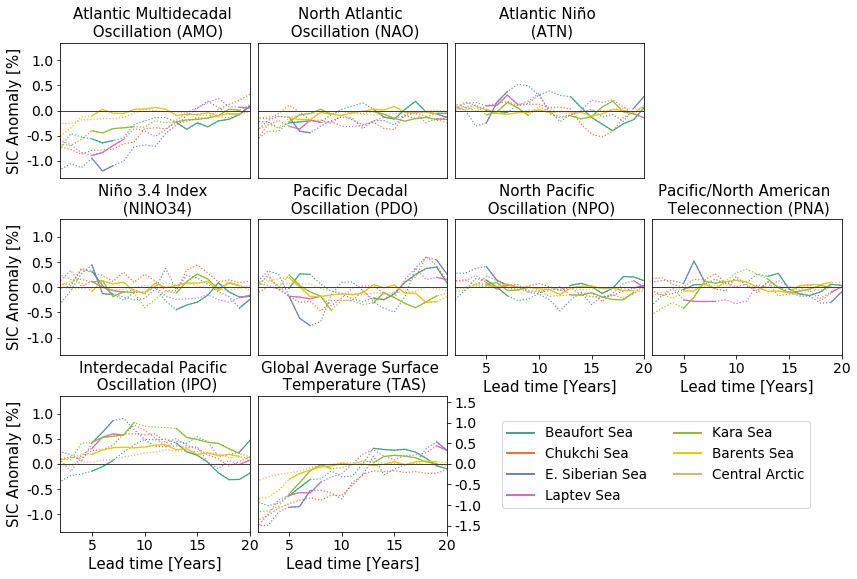

In [296]:
#### now split by season for the MMLEs - remember to uncomment the correct
#persistence dataset
cmap = plt.cm.Set2  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)] #all the colors in the cmap

month_list = np.ones(7).astype('int')*9
# month_list[6] = 8
fig, axes = plt.subplots(3,4,figsize=[14,9])
for var_i, var_ in enumerate(['AMO', 'NAO', 'ATN',
                              'NINO34', 'PDO', 'NPO', 'PNA', 
                              'IPO', 'TAS']):
    
    x_ax = [0,0,0,1,1,1,1,2,2][var_i]
    y_ax = [0,1,2,0,1,2,3,0,1][var_i]
    
    for region_i, region_ in enumerate([1,2,3,4,5,6,11]):
        if var_ not in ['foo']:
            weight_data = annual_MMLE_3_weights.sel(
                month=month_list[region_i]).sel(region=region_).sel(
                mode_month=[var_+'_'+str(var_season_list_plot[var_i])])*100
        else:
            weight_data = annual_MMLE_3_weights.sel(
                month=month_list[region_i]).sel(region=region_).sel(
                mode_month=[var_+'_1',var_+'_4',var_+'_7',var_+'_10']).sum(
                'mode_month')*100
        
        # CMIP6_persistence = xr.Dataset(persistence_lowpass).to_array().mean(
        #     'member').mean('variable').sel(region=region_).sel(
        #     month=month_list[region_i])
        CMIP6_persistence = xr.Dataset(persistence_lowpass_1970).to_array().mean(
            'member').mean('variable').sel(region=region_).sel(
            month=month_list[region_i])
        # CMIP6_persistence = PI_persistence['r_value'].mean('member').sel(
        #     region=region_).sel(month=month_list[region_i])
        CMIP6_persistence = CMIP6_persistence.where(CMIP6_persistence>0,0)**2
        CMIP6_r2 = annual_MMLE_3_r.sel(month=month_list[region_i]).sel(
            region=region_).sel(ML_model=0)**2
    
        weight_true = weight_data.where(CMIP6_r2>=CMIP6_persistence)
        
        axes[x_ax][y_ax].plot(np.arange(1,21), np.ravel(weight_data),  
            c=lighten_color(cmaplist[region_i], amount=1.3), 
                              linestyle='dotted', linewidth=1.2)
        
        axes[x_ax][y_ax].plot(np.arange(1,21), np.ravel(weight_true), 
            c=lighten_color(cmaplist[region_i], amount=1.3), 
            label=region_names_short[region_-1], linewidth=1.2)#\
            # +f', {month_names_short[month_list[region_i]-1]}', linewidth=1.2)
        
    #add extra items to the subplots    
    axes[x_ax][y_ax].axhline(0, linestyle='-', c='0.25', linewidth=1);

    axes[x_ax][y_ax].set_xlim(2,20)
  
    if var_i == 8:
        axes[x_ax][y_ax].set_ylim(-1.65,1.65)#-4.2,0.4) 
    else:
        axes[x_ax][y_ax].set_ylim(-1.35,1.35)#-1.7,1.7) 
        # axes[x_ax][y_ax].set_ylim(-1,1) 

    axes[x_ax][y_ax].tick_params(axis='both', labelsize=14)

    if var_ in ['NPO','PNA','IPO','TAS']:
        axes[x_ax][y_ax].set_xticks([5,10,15,20])
        axes[x_ax][y_ax].set_xlabel('Lead time [Years]', fontsize=15)
    else:
        axes[x_ax][y_ax].set_xticks([])

    if var_i == 8:
        # axes[x_ax][y_ax].set_ylabel('SIC Anomaly [%]', fontsize=15) 
        # axes[x_ax][y_ax].set_yticks(np.arange(-4,4.1,1))
        axes[x_ax][y_ax].set_yticks(np.arange(-1.5,1.6,0.5))
        # axes[x_ax][y_ax].set_yticks(np.arange(-1,1.1,0.5))
        axes[x_ax][y_ax].set_yticklabels(
            # ['-2.0','-1.5','-1.0','-0.5','0.0'])
            # ['-4','-3','-2','-1','0','1','2','3','4'])
            ['-1.5','-1.0','-0.5','0.0','0.5','1.0','1.5'])
        axes[x_ax][y_ax].yaxis.tick_right()
        axes[x_ax][y_ax].yaxis.set_label_position("right")
            
    elif var_i in [0,3,7]:
        axes[x_ax][y_ax].set_ylabel('SIC Anomaly [%]', fontsize=15) 
        axes[x_ax][y_ax].set_yticks(np.arange(-1.0,1.01,0.5))
        # axes[x_ax][y_ax].set_yticks(np.arange(-0.5,0.56,0.25))
        # axes[x_ax][y_ax].set_yticks(np.arange(-0.20,0.21,0.1))
        axes[x_ax][y_ax].set_yticklabels(
            ['-1.0','-0.5','0.0','0.5','1.0'])
            # ['-1.5','-1.0','-0.5','0.0','0.5','1.0','1.5'])
            # ['-0.2','-0.1','0.0','0.1','0.2'])
            
    else:
        axes[x_ax][y_ax].set_yticks([])

    axes[x_ax][y_ax].set_title(CVDP_var_descriptions_short[var_], fontsize=15)

    if var_i == 8:
        leg = axes[x_ax][y_ax].legend(bbox_to_anchor=(2.1, 0.2), 
            loc='lower center', borderaxespad=-0.25, ncol=2, fontsize=13.5)
        
        for legobj in leg.legendHandles:
            legobj.set_linewidth(2.0)

            
fig.delaxes(axes[0][3])
fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])

plt.subplots_adjust(hspace=0.3, wspace=0.04)

fig.savefig('/glade/work/cwpowell/low-frequency-variability/figures/'\
    +f'Fig_S1_coefs_MMLE_3_September_MMLE_9_best_season_LE_1970_2014.pdf',
    bbox_inches='tight')

# Figure 5 - Linear coefficients by large ensemble and multi-model large ensemble

In [16]:
CVDP_var_descriptions_extra_short = {
    'AMO': 'Atlantic Multidecadal \n Oscillation (AMO)',
    'IPO': 'Interdecadal Pacific \n Oscillation (IPO)',
    'NINO34': 'Niño 3.4 Index \n (NINO34)',
    'PDO': 'Pacific Decadal \n Oscillation (PDO)',
    'AMM': 'Atlantic Meridional \n Mode (AMM)',
    'ATN': 'Atlantic Niño \n (ATN)',
    'IOD': 'Indian Ocean Dipole \n (IOD)',
    'NPI': 'North Pacific Index \n (NPI)',                         
    'NAM': 'Northern Annular \n Mode (NAM)',
    'NPO': 'North Pacific \n Oscillation (NPO)',
    'PNA': 'Pacific/North American \n Teleconnection (PNA)',
    'NAO': 'North Atlantic \n Oscillation (NAO)',
    'SAM': 'Southern Annular \n Mode (SAM)',
    'TAS': 'Global Average Surface \n Temperature (TAS)',
                        }

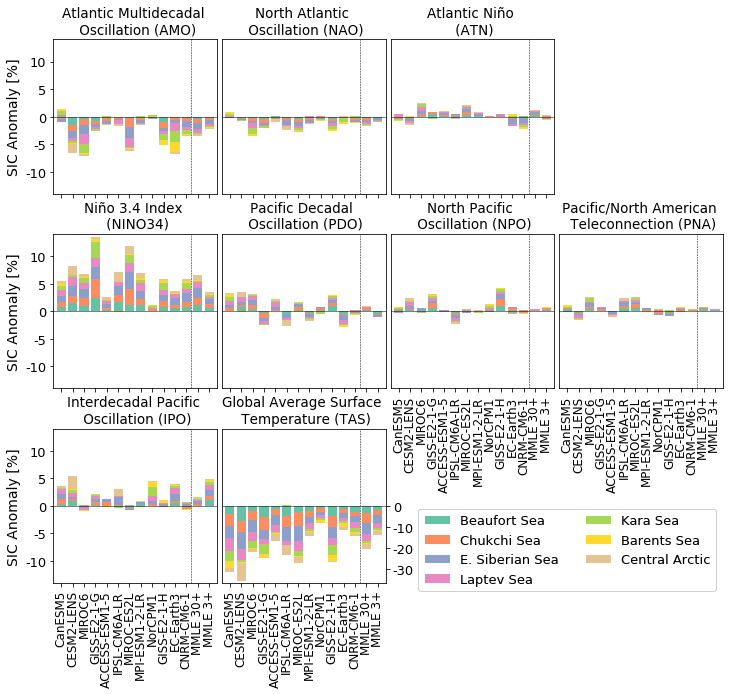

In [19]:
#plot lines for each model with lag, exclude the 4 remote/higher frequency vars
cmap = plt.cm.Set2  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)] #all the colors in the cmap

y_lims = np.ones(14)*14#5.3
# y_lims[7] = 30
y_lims[8] = 36.5 #28

lag_range = np.arange(4,10)
month_list = np.ones(7).astype('int')*9

fig, axes = plt.subplots(3,4,figsize=[12,10])

for var_i, var_ in enumerate(['AMO', 'NAO', 'ATN',
                              'NINO34', 'PDO', 'NPO', 'PNA', 
                              'IPO', 'TAS']): 

    x_ax = [0,0,0,1,1,1,1,2,2][var_i]#int(np.floor(var_i/3))
    y_ax = [0,1,2,0,1,2,3,0,1][var_i]#int(var_i % 3)

    for GCM_i, GCM in enumerate(GCM_LE):

        running_total_pos = 0
        running_total_neg = 0
        for region_i, region_ in enumerate([1,2,3,4,5,6,11]):
            if var_ not in ['foo']:
                region_GCM_val = all_weights_regions[GCM].sel(
                    region=region_).sel(lag=lag_range).mean('lag').sel(
                    month=month_list[region_i]).sel(
                    mode_month=[var_+'_'+str(var_season_list_plot[var_i])])
            else:
                region_GCM_val = all_weights_regions[GCM].sel(
                    region=region_).sel(lag=lag_range).mean('lag').sel(
                    month=month_list[region_i]).sel(
                    mode_month=[var_+'_1',var_+'_4',
                                var_+'_7',var_+'_10']).sum(
                    'mode_month')

            if region_GCM_val > 0:
                axes[x_ax][y_ax].bar(
                    GCM_i, region_GCM_val*100, bottom=running_total_pos,
                    color=cmaplist[region_i])
                running_total_pos += region_GCM_val*100
            else:
                axes[x_ax][y_ax].bar(
                    GCM_i, region_GCM_val*100, bottom=running_total_neg,
                    color=cmaplist[region_i])
                running_total_neg += region_GCM_val*100
    
    #plot MMLE 3+ too
    running_total_pos = 0
    running_total_neg = 0
    for region_i, region_ in enumerate([1,2,3,4,5,6,11]):
        if var_ not in ['foo']:
            region_CMIP6_val = annual_MMLE_3_weights.sel(region=region_).sel(
            lag=lag_range).mean('lag').sel(month=month_list[region_i]).sel(
                mode_month=[var_+'_'+str(var_season_list_plot[var_i])])
        else:
            region_CMIP6_val = annual_MMLE_3_weights.sel(region=region_).sel(
            lag=lag_range).mean('lag').sel(month=month_list[region_i]).sel(
                mode_month=[var_+'_1',var_+'_4',var_+'_7',
                            var_+'_10']).sum('mode_month')

        if region_CMIP6_val > 0:
            axes[x_ax][y_ax].bar(
                13, region_CMIP6_val*100, bottom=running_total_pos,
                color=cmaplist[region_i])
            running_total_pos += region_CMIP6_val*100
        else:
            axes[x_ax][y_ax].bar(
                13, region_CMIP6_val*100, bottom=running_total_neg,
                color=cmaplist[region_i])
            running_total_neg += region_CMIP6_val*100

            
    #plot MMLE 30+ too
    running_total_pos = 0
    running_total_neg = 0
    for region_i, region_ in enumerate([1,2,3,4,5,6,11]):
        if var_ not in ['foo']:
            region_CMIP6_val = annual_MMLE_30_weights.sel(region=region_).sel(
            lag=lag_range).mean('lag').sel(month=month_list[region_i]).sel(
                mode_month=[var_+'_'+str(var_season_list_plot[var_i])])
        else:
            region_CMIP6_val = annual_MMLE_30_weights.sel(region=region_).sel(
            lag=lag_range).mean('lag').sel(month=month_list[region_i]).sel(
                mode_month=[var_+'_1',var_+'_4',var_+'_7',
                            var_+'_10']).sum('mode_month')

        if region_CMIP6_val > 0:
            axes[x_ax][y_ax].bar(
                12, region_CMIP6_val*100, bottom=running_total_pos,
                color=cmaplist[region_i])
            running_total_pos += region_CMIP6_val*100
        else:
            axes[x_ax][y_ax].bar(
                12, region_CMIP6_val*100, bottom=running_total_neg,
                color=cmaplist[region_i])
            running_total_neg += region_CMIP6_val*100


    #add items to the subplots
    axes[x_ax][y_ax].set_ylim(-1*y_lims[var_i],y_lims[var_i])
    axes[x_ax][y_ax].axhline(0, c='k', linewidth=0.5)
    axes[x_ax][y_ax].axvline(11.45, c='k', linestyle='--', linewidth=0.5)

    axes[x_ax][y_ax].set_xlim(-0.7,13.7)
    axes[x_ax][y_ax].set_xticks(np.arange(0,len(GCM_LE)+2))

    if x_ax == 2 or (x_ax == 1 and y_ax in [2,3]):
        axes[x_ax][y_ax].set_xticklabels(GCM_LE+['MMLE 30+']+['MMLE 3+'], 
                                         rotation=90, fontsize=12)
    else:
        axes[x_ax][y_ax].set_xticklabels([])

    if var_i in [0,3,7]:
        axes[x_ax][y_ax].set_ylabel('SIC Anomaly [%]', fontsize=14) 
        axes[x_ax][y_ax].set_yticks([-10,-5,0,5,10]) 
        axes[x_ax][y_ax].set_yticklabels(['-10','-5','0','5','10'], 
                                         fontsize=13) 
    # elif var_i in [7]:
    #     axes[x_ax][y_ax].set_ylabel('SIC Anomaly [%]', fontsize=14) 
    #     axes[x_ax][y_ax].set_yticks([-30,-20,-10,0,10,20,30]) 
    #     axes[x_ax][y_ax].set_yticklabels(['-30','-20','-10','0','10','20','30'], 
    #                                      fontsize=13)     
    
    elif var_i == 8:
        axes[x_ax][y_ax].yaxis.tick_right()
        # axes[x_ax][y_ax].set_yticks([-25,-20,-15,-10,-5,0]) 
        # axes[x_ax][y_ax].set_yticklabels(['-25','-20','-15','-10','-5','0'], 
        #                                  fontsize=13) 
        axes[x_ax][y_ax].set_yticks([-30,-20,-10,0]) 
        axes[x_ax][y_ax].set_yticklabels(['-30','-20','-10','0'], 
                                         fontsize=13) 
    else:
        axes[x_ax][y_ax].set_yticks([]) 

    axes[x_ax][y_ax].set_title(
        CVDP_var_descriptions_extra_short[var_], fontsize=13.5)

fig.delaxes(axes[0][3])       
fig.delaxes(axes[2][2])       
fig.delaxes(axes[2][3])       
plt.subplots_adjust(hspace=0.26, wspace=0.03)

legend_elements = []
for region_i, region_ in enumerate([1,2,3,4,5,6,11]):
    legend_elements.append(
        Patch(facecolor=cmaplist[region_i], ec='1', 
              label=region_names_short[region_-1])#+', '\
              # +month_names[month_list[region_i]-1])
    )

extra_legend = plt.legend(
    handles=legend_elements, bbox_to_anchor=(1.2, -0.05), loc='lower left',
    borderaxespad=0., ncol=2, fontsize=13)

plt.gca().add_artist(extra_legend);
# axes[0][0].text(-2.5,16, 'b)', fontsize=14, fontweight='bold');
fig.savefig('/glade/work/cwpowell/low-frequency-variability/figures/'\
    +f'Fig_5_lag_4_9_var_9_Sep_best_LE_sep_season_no_letter.pdf', bbox_inches='tight')

## Figure S3 - Separate macro perturbations for CESM2-LENS

In [254]:
CESM2_LENS_macro_groups = {
    '1041':[0], '1061':[1], '1081':[2],'1101':[3],
    '1121':[4], '1141':[5], '1161':[6], '1181':[7], 
    '1231':np.arange(8,18), '1251':np.arange(18,28), 
    '1281':np.arange(28,38), '1301':np.arange(38,48)
}

In [252]:
CESM2_data = []
for region_i, region_ in enumerate([1,2,3,4,5,6,11]):
    r_val_GCM = r_val_by_GCM['r_value'].sel(month=month_list[region_i]).sel(
        region=region_).sel(lag=lag_range).mean('lag').sel(
        model_name='CESM2-LENS')

    mem_len_GCM = len(r_val_GCM.where(r_val_GCM>-999,drop=True))
    #change any negative values (but not nans) to zero
    r_val_GCM = r_val_GCM.where(np.logical_not(r_val_GCM<0),0)

    persist_GCM = persistence_all_GCM['CESM2-LENS'].sel(
        month=month_list[region_i]).sel(
        region=region_).sel(lag=5)
    persist_GCM = persist_GCM.where(persist_GCM>0,0)

    data = (r_val_GCM.where(r_val_GCM>-999,drop=True).values 
            - persist_GCM.isel(member=slice(2,mem_len_GCM+2)).values)

    data = data*0 + np.where(data>0, data, 0)
    
    CESM2_data.append(data)

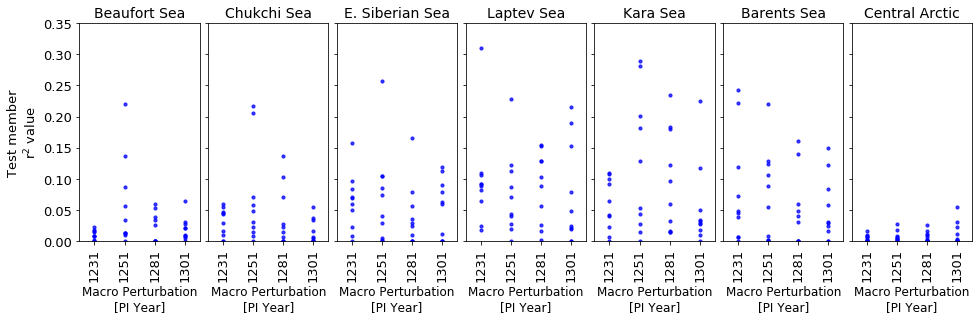

In [269]:
#now remove persistence for CESM2-LENS
CESM_r = r_val_by_GCM['r_value'].sel(model_name='CESM2-LENS').sel(lag=5).sel(
    month=9)
CESM_persist = persistence_all_GCM['CESM2-LENS'].sel(lag=5).sel(month=9)
CESM_persist['member'] = np.arange(0,50)

fig, axes = plt.subplots(1,7,figsize=[16,4])

for region_i, region_ in enumerate([1,2,3,4,5,6,11]):
    
    # for macro_i, macro in enumerate(list(CESM2_LENS_macro_groups.keys())):
    for macro_i, macro in enumerate(['1231','1251','1281','1301']):
        mem_i = CESM2_LENS_macro_groups[macro]
        
        data = CESM_r.sel(region=region_).sel(member=mem_i)
        persist_data = CESM_persist.sel(region=region_).sel(member=mem_i)
        
        data = data.where(data>0, 0) - persist_data.where(persist_data>0, 0)        
        
        # axes[x_ax][y_ax].bar(macro_i, np.mean(CESM2_data[region_i][mem_i]**2),
        #                    facecolor='1', edgecolor='k', alpha=1, zorder=0);
        
        axes[region_i].scatter(np.ones(len(mem_i))*macro_i, 
                               CESM2_data[region_i][mem_i]**2, color='b', 
                               s=10, alpha=0.75)
    
    axes[region_i].set_ylim(0,0.35)
    axes[region_i].set_xlim(-0.5,3.5)
    axes[region_i].set_title(region_names_short[region_-1], fontsize=14)
    # axes[x_ax][y_ax].set_xticks(
    #         np.arange(len((CESM2_LENS_macro_groups.keys()))))
    axes[region_i].set_xticks([0,1,2,3])
    axes[region_i].set_yticks(np.round(np.arange(0,0.36,0.05),2))
    
    if region_i in [0]:
        axes[region_i].set_yticklabels(['0.00','0.05','0.10','0.15','0.20',
                                        '0.25','0.30','0.35'], fontsize=13)
        axes[region_i].set_ylabel('Test member'+'\n'+f'r$^2$ value', fontsize=13)
    else:
        axes[region_i].set_yticklabels([])
    
    if region_i in [0,1,2,3,4,5,6]:
        # axes[x_ax][y_ax].set_xticklabels(list(CESM2_LENS_macro_groups.keys()),
        #                           rotation=90, fontsize=13)
        axes[region_i].set_xticklabels(['1231','1251','1281','1301'],
                                  rotation=90, fontsize=13)
        axes[region_i].set_xlabel(
            'Macro Perturbation'+'\n'+'[PI Year]', fontsize=12)
    else:
        axes[region_i].set_xticklabels([])

plt.subplots_adjust(hspace=0.26, wspace=0.07);

fig.savefig('/glade/work/cwpowell/low-frequency-variability/figures/'\
    +f'Fig_S3_CESM2_micro_macro_minus_persist_4_macro_September.pdf',
            bbox_inches = 'tight')

# Figure 6 - test r2 values for the LEs and MMLE 3+


In [3]:
LE_test = xr.open_dataset(
    '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
    +f'test_r_values_linear_LEs_var_9_best_season_LE_all_region_Sep.nc'
)

r_val_by_GCM = xr.open_dataset(
    '/glade/work/cwpowell/low-frequency-variability/PyTorch_models/'\
    'test_r_values_linear_CMIP6_var_9_best_season_LE_all_region_Sep.nc'
)

In [14]:
persistence_all_GCM = {}
month_list = np.arange(1,13)
for GCM in all_GCM_list:
    persistence_all_GCM[GCM] = xr.open_dataset(
        '/glade/work/cwpowell/low-frequency-variability/null_model/Pearson_'\
        +f'correlation_SIC_lagged_1_20_years_lowpass_{GCM}.nc')['r_value']
    

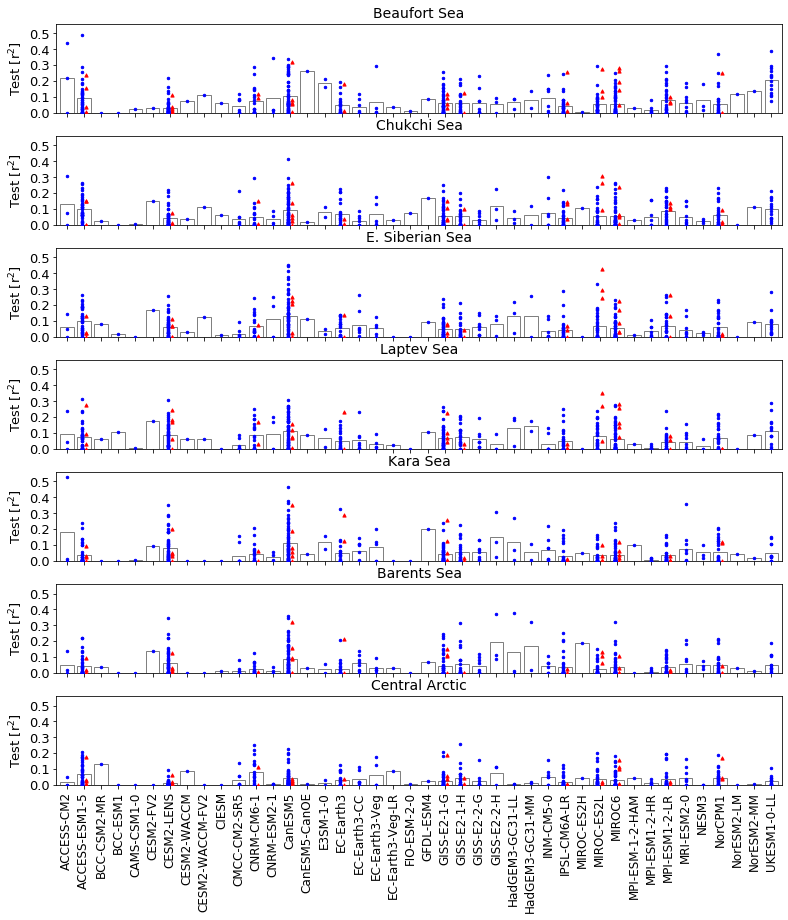

In [251]:
warnings.filterwarnings('ignore')
#plot regions 1,2,11 as a 3 part subplot
month_list = np.ones(7).astype('int')*9#[9,8,10,10,10,8,8]#[9,10,9,10,10,1,8]#[9, 8, 10, 10, 10, 9, 8]
lag_range = np.arange(5,6)

fig, axes = plt.subplots(7,1,figsize=[13,14])
for region_i, region_ in enumerate([1,2,3,4,5,6,11]):
    for GCM_i, GCM in enumerate(r_val_by_GCM['model_name'].values):
        r_val_GCM = r_val_by_GCM['r_value'].sel(month=month_list[region_i]).sel(
            region=region_).sel(lag=lag_range).mean('lag').sel(
            model_name=GCM)
        
        mem_len_GCM = len(r_val_GCM.where(r_val_GCM>-999,drop=True))
        #change any negative values (but not nans) to zero
        r_val_GCM = r_val_GCM.where(np.logical_not(r_val_GCM<0),0)
        
        persist_GCM = persist_GCM = persistence_all_GCM[GCM].sel(
            month=month_list[region_i]).sel(
            region=region_).sel(lag=lag_range).mean('lag')
        persist_GCM = persist_GCM.where(persist_GCM>0,0)
        
        data = (r_val_GCM.where(r_val_GCM>-999,drop=True).values 
                - persist_GCM.isel(member=slice(2,mem_len_GCM+2)).values)
        
        data = data*0 + np.where(data>0, data, 0)
        
        if GCM in list(LE_test.to_array()['variable'].values):
            adjust = -0.12
            
            r_val_LE = LE_test[GCM].sel(month=month_list[region_i]).sel(
                region=region_).sel(lag=lag_range).mean('lag')
            r_val_LE = r_val_LE.where(r_val_LE>-999,drop=True).values
            
            data_LE = (r_val_LE - persist_GCM.isel(
                member=slice(len(persist_GCM)-len(r_val_LE),None)).values)
        
            data_LE = data_LE*0 + np.where(data_LE>0, data_LE, 0)
            
            
            axes[region_i].scatter(
                np.ones(len(data_LE))*GCM_i-adjust, data_LE**2, color='red', 
                s=10, marker='^', zorder=4,
            )
            
            # axes[region_i].bar(GCM_i, np.nanmean(data_LE**2), facecolor='1', 
            #                edgecolor='r', alpha=1, zorder=2);
            
        else:
            adjust = 0

        axes[region_i].scatter(
            np.ones(len(data))*GCM_i+adjust, data**2, color='b', s=6, 
            marker='o', zorder=4,
        )
        
        axes[region_i].bar(GCM_i, np.nanmean(data**2), facecolor='1', 
                           edgecolor='0.5', alpha=1, zorder=3);

    axes[region_i].set_ylim(0,0.56)
    axes[region_i].set_xlim(-0.6,GCM_i+0.6)
    axes[region_i].set_yticks(np.round(np.arange(0,0.51,0.1),2))
    axes[region_i].set_yticklabels(
        ['0.0','0.1','0.2','0.3','0.4','0.5'], fontsize=13)
    
    if region_i == 6:
        axes[region_i].set_xticks(range(0,GCM_i+1))
        axes[region_i].set_xticklabels(r_val_by_GCM['model_name'].values, 
           rotation=90, fontsize=12);
    else:
        axes[region_i].set_xticks(range(0,GCM_i+1))
        axes[region_i].set_xticklabels([])
        
    axes[region_i].set_title(
        region_names_short[region_-1], fontsize=14)#+', '+month_names[month_list[region_i]-1],
        #fontsize=14);
    axes[region_i].set_ylabel(r'Test [r$^2$]', fontsize=13);

plt.subplots_adjust(hspace=0.26);
fig.savefig('/glade/work/cwpowell/low-frequency-variability/figures/'\
    +f'Fig_6_r2_test_var_9_best_LE_season_September_5yr_minus_persistence.pdf', 
    bbox_inches='tight')